# Linear Discriminant Analysis

SkLearn LDA Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html <br>
Iris Data Set: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html <br>
Original LDA Tutorial: https://www.statology.org/linear-discriminant-analysis-in-python/ <br>
Sklearn Model Selection Documentation: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection 


## 0. Load Libraries

In [1]:
#LOAD NECESSARY LIBRARIES
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import datasets

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import matplotlib.cm as cm

# pip install dmba (install dmba if you dont have it already)
from dmba import classificationSummary


## 1. In Class Example
For this example we are going to go through the LDA 2-class mechanics by hand matching the results we present in class

In [2]:
# load the data
X = pd.read_csv('LDA_in_class.csv')
print(X)

   X1  X2  Class
0   4   2      1
1   2   4      1
2   2   3      1
3   3   6      1
4   4   4      1
5   9  10      2
6   6   8      2
7   9   5      2
8   8   7      2
9  10   8      2


In [3]:
C1=X.iloc[0:5,0:2]
print(C1)

   X1  X2
0   4   2
1   2   4
2   2   3
3   3   6
4   4   4


In [4]:
C2=X.iloc[5:10,0:2]
print(C2)

   X1  X2
5   9  10
6   6   8
7   9   5
8   8   7
9  10   8


(0.0, 12.0)

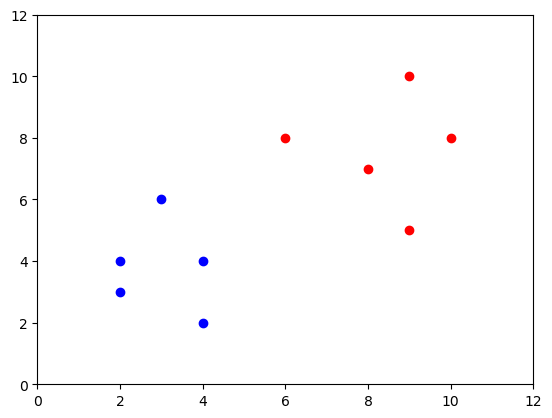

In [5]:
plt.scatter(C1['X1'],C1['X2'], c='blue')
plt.scatter(C2['X1'],C2['X2'], c='red')
plt.xlim(0, 12)
plt.ylim(0, 12)

In [6]:
x1_bar = C1.mean()
print(x1_bar)

X1    3.0
X2    3.8
dtype: float64


In [7]:
x2_bar = C2.mean()
print(x2_bar)

X1    8.4
X2    7.6
dtype: float64


(0.0, 12.0)

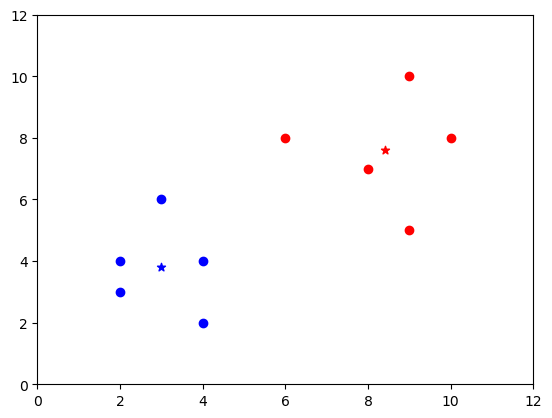

In [8]:
plt.scatter(C1['X1'],C1['X2'], c='blue')
plt.scatter(C2['X1'],C2['X2'], c='red')
plt.scatter(x1_bar['X1'],x1_bar['X2'], c='blue',marker='*')
plt.scatter(x2_bar['X1'],x2_bar['X2'], c='red',marker='*')
plt.xlim(0, 12)
plt.ylim(0, 12)

In [9]:
S1=C1.cov()
print(S1)

      X1    X2
X1  1.00 -0.25
X2 -0.25  2.20


In [10]:
S2=C2.cov()
print(S2)

      X1    X2
X1  2.30 -0.05
X2 -0.05  3.30


In [11]:
S_W=1/8*(4*S1+4*S2)
print(S_W)

      X1    X2
X1  1.65 -0.15
X2 -0.15  2.75


In [12]:
SWinv=np.linalg.inv(S_W)
print(SWinv)

[[0.60908084 0.03322259]
 [0.03322259 0.3654485 ]]


In [13]:
delta=np.array(x1_bar-x2_bar)
print(delta)

[-5.4 -3.8]


In [14]:
S_B=np.outer(delta,delta.T)
print(S_B)

[[29.16 20.52]
 [20.52 14.44]]


In [15]:
SWinv@S_B

array([[18.44252492, 12.97807309],
       [ 8.46777409,  5.95880399]])

In [16]:
eVals, eVecs =  np.linalg.eig(SWinv@S_B)
print("The eigenvalues are {}" .format(eVals))

The eigenvalues are [2.44013289e+01 1.60936574e-15]


In [17]:
print(eVecs)

[[ 0.90878558 -0.57549341]
 [ 0.41726342  0.81780642]]


Can also calculate w directly

In [18]:
SWinv@delta

array([-3.41528239, -1.56810631])

In [19]:
SWinv@delta/np.linalg.norm(SWinv@delta)

array([-0.90878558, -0.41726342])

This allows us to calculate h(x), aka slope and intercept of our hyperplane

In [20]:
h_coefficents=delta.T@SWinv
print(h_coefficents)

[-3.41528239 -1.56810631]


In [21]:
h_intercept=(-1/2)*delta.T@SWinv@(x1_bar+x2_bar)
print(h_intercept)

28.40531561461794


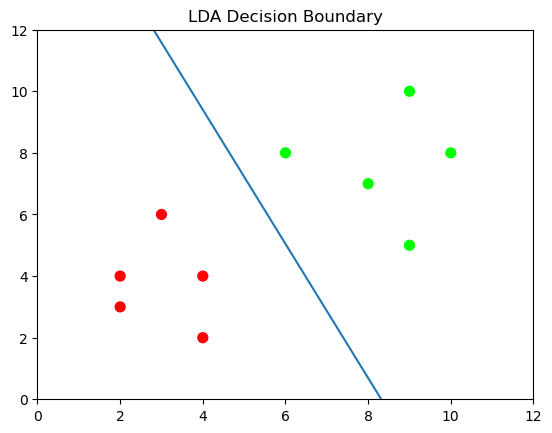

In [22]:
#Scatter plot points
colors = cm.brg(X['Class']/2)
pp.scatter(X['X1'], X['X2'],s=50,c = colors)

#LDA decision boundry
x = np.array(range(0,100))
y = -(x*h_coefficents[0] + h_intercept)/h_coefficents[1]
pp.plot(x,y)

#Display joint plot
pp.title('LDA Decision Boundary')
pp.xlim(0, 12)
pp.ylim(0, 12)
pp.show()

## 2. Rencher Example
This is also a 2 class example, but in this case we will use the built in LDA models from sklearn

In [23]:
# load the data
temp_df = pd.read_csv('rencherexample.csv')
print(temp_df)

    Group  y1  y2
0       1  33  60
1       1  36  61
2       1  35  64
3       1  38  63
4       1  40  65
5       2  35  57
6       2  36  59
7       2  38  59
8       2  39  61
9       2  41  63
10      2  43  65
11      2  41  59


In [24]:
# fit an LDA
lda_reg = LinearDiscriminantAnalysis()
lda_reg.fit(temp_df.drop(columns=['Group']), temp_df['Group'])

LinearDiscriminantAnalysis()

In [25]:
# determine the intercept and coefficients
Intercept = lda_reg.intercept_
Coeffs = lda_reg.coef_
print('The intercept is {}'.format(Intercept))
print('The LDA coefficients are {}'.format(Coeffs))

The intercept is [50.70056277]
The LDA coefficients are [[ 1.63337671 -1.81977879]]


In [26]:
# output confusion matrix information
# Uses DMBA https://github.com/gedeck/dmba
# classificationSummary (y_true, y_pred, class_names = None)
classificationSummary(temp_df['Group'],
 lda_reg.predict(temp_df.drop(columns=['Group'])),
 class_names=lda_reg.classes_) 

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual 1 2
     1 5 0
     2 0 7


In [27]:
# summarize results 
# includes predicted vs actual, decision function output, and probabilities
result = pd.concat([
 pd.DataFrame({'Predicted': lda_reg.predict(temp_df.drop(columns=['Group'])),
 'Actual': temp_df['Group']}),
 pd.DataFrame(lda_reg.decision_function(temp_df.drop(columns=['Group'])),
 columns=['Decision Function Output(h(x))']),
 pd.DataFrame(lda_reg.predict_proba(temp_df.drop(columns=['Group'])),
 columns=['Prob {}'.format(cls) for cls in lda_reg.classes_]),
],axis=1)
print(result)

    Predicted  Actual  Decision Function Output(h(x))    Prob 1    Prob 2
0           1       1                       -4.584733  0.989897  0.010103
1           1       1                       -1.504382  0.818227  0.181773
2           1       1                       -8.597095  0.999815  0.000185
3           1       1                       -1.877186  0.867288  0.132712
4           1       1                       -2.249990  0.904650  0.095350
5           2       2                        4.141357  0.015652  0.984348
6           2       2                        2.135176  0.105725  0.894275
7           2       2                        5.401929  0.004488  0.995512
8           2       2                        3.395748  0.032429  0.967571
9           2       2                        3.022944  0.046400  0.953600
10          2       2                        2.650140  0.065980  0.934020
11          2       2                       10.302059  0.000034  0.999966


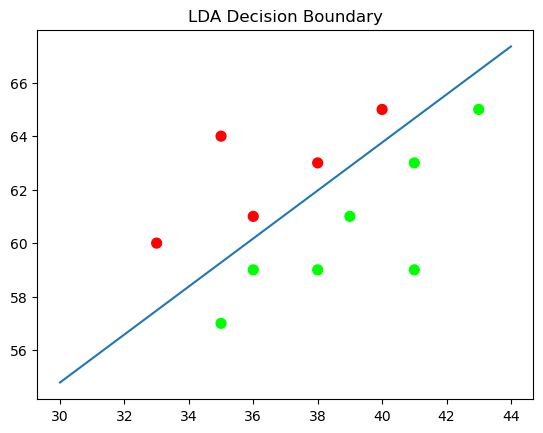

In [28]:
# Plot data with decision boundary
colors = cm.brg(temp_df['Group']/2)
pp.scatter(temp_df['y1'], temp_df['y2'],s=50,c = colors)
x = np.array(range(30,45))
y = -(x*Coeffs[0,0] + Intercept)/Coeffs[0,1]
pp.plot(x,y)
pp.title('LDA Decision Boundary')
pp.show()

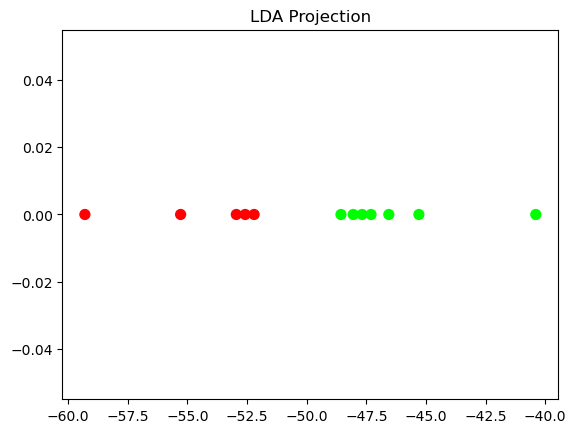

In [29]:
# Plot in LDA projected space
projected = temp_df['y1']*Coeffs[0,0]+temp_df['y2']*Coeffs[0,1]
pp.scatter(projected, np.zeros_like(projected),s=50,c = colors)
pp.title('LDA Projection')
pp.show()
